# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [65]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [66]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | yerofey pavlovich
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | sumbe
Processing Record 7 of Set 1 | ghadamis
Processing Record 8 of Set 1 | petropavlovsk-kamchatsky
Processing Record 9 of Set 1 | coquimbo
Processing Record 10 of Set 1 | yylanly
City not found. Skipping... 'coord'
Processing Record 11 of Set 1 | taiohae
City not found. Skipping... 'coord'
Processing Record 12 of Set 1 | ust'-ilimsk
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | port douglas
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | la passe
Processing Record 17 of Set 1 | yeniseysk
Processing Record 18 of Set 1 | yuzhno-kurilsk
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | neiafu
Processin

In [67]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [89]:
# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,282.98,76,100,2.24,CA,1720656568
1,adamstown,-25.0660,-130.1015,293.75,67,92,7.34,PN,1720656752
2,yerofey pavlovich,53.9667,121.9667,291.90,68,87,0.55,RU,1720656754
3,waitangi,-43.9535,-176.5597,281.38,87,78,4.47,NZ,1720656755
4,grytviken,-54.2811,-36.5092,271.14,90,99,4.80,GS,1720656756
5,sumbe,-11.2061,13.8437,292.51,91,14,3.64,AO,1720656757
6,ghadamis,30.1337,9.5007,307.73,15,0,3.89,LY,1720656758
7,petropavlovsk-kamchatsky,53.0452,158.6483,288.48,82,75,1.00,RU,1720656759
8,coquimbo,-29.9533,-71.3436,283.00,67,0,2.06,CL,1720656622
9,ust'-ilimsk,58.0006,102.6619,293.91,86,62,1.24,RU,1720656729


In [69]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [70]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,282.98,76,100,2.24,CA,1720656568
1,adamstown,-25.0660,-130.1015,293.75,67,92,7.34,PN,1720656752
2,yerofey pavlovich,53.9667,121.9667,291.90,68,87,0.55,RU,1720656754
3,waitangi,-43.9535,-176.5597,281.38,87,78,4.47,NZ,1720656755
4,grytviken,-54.2811,-36.5092,271.14,90,99,4.80,GS,1720656756
5,sumbe,-11.2061,13.8437,292.51,91,14,3.64,AO,1720656757
6,ghadamis,30.1337,9.5007,307.73,15,0,3.89,LY,1720656758
7,petropavlovsk-kamchatsky,53.0452,158.6483,288.48,82,75,1.00,RU,1720656759
8,coquimbo,-29.9533,-71.3436,283.00,67,0,2.06,CL,1720656622


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

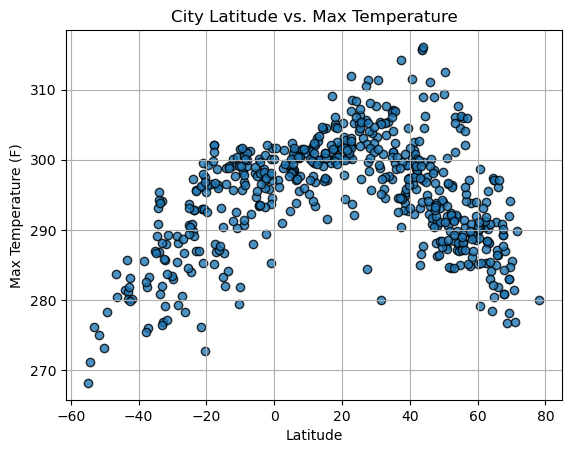

In [71]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.80)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

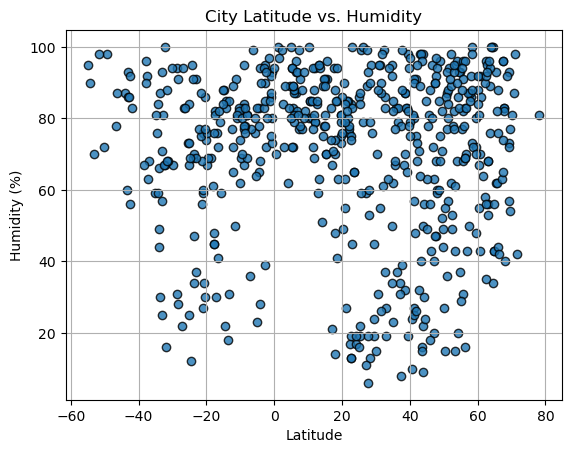

In [72]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.80)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

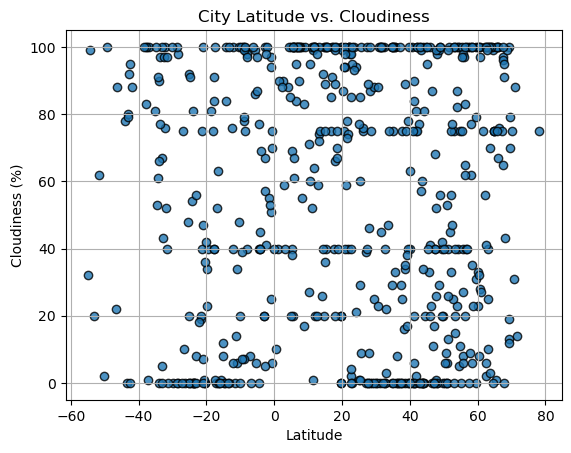

In [73]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.80)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

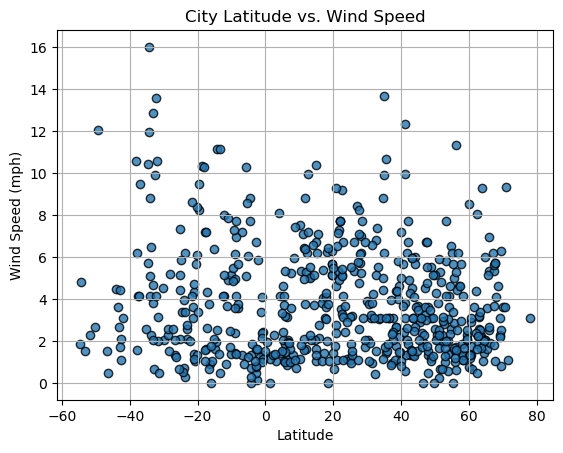

In [74]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.80)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [75]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
city_data_df = pd.DataFrame(city_data)

In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,282.98,76,100,2.24,CA,1720656568
2,yerofey pavlovich,53.9667,121.9667,291.90,68,87,0.55,RU,1720656754
6,ghadamis,30.1337,9.5007,307.73,15,0,3.89,LY,1720656758
7,petropavlovsk-kamchatsky,53.0452,158.6483,288.48,82,75,1.00,RU,1720656759
9,ust'-ilimsk,58.0006,102.6619,293.91,86,62,1.24,RU,1720656729
12,georgetown,5.4112,100.3354,300.11,83,20,1.03,MY,1720656596
13,la passe,45.5549,-0.8967,292.28,81,33,2.88,FR,1720656768
14,yeniseysk,58.4497,92.1703,289.17,73,6,1.10,RU,1720656769
15,yuzhno-kurilsk,44.0306,145.8556,287.71,98,100,2.67,RU,1720656770
18,stanley,54.8680,-1.6985,284.97,93,75,2.57,GB,1720656773


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,adamstown,-25.0660,-130.1015,293.75,67,92,7.34,PN,1720656752
3,waitangi,-43.9535,-176.5597,281.38,87,78,4.47,NZ,1720656755
4,grytviken,-54.2811,-36.5092,271.14,90,99,4.80,GS,1720656756
5,sumbe,-11.2061,13.8437,292.51,91,14,3.64,AO,1720656757
8,coquimbo,-29.9533,-71.3436,283.00,67,0,2.06,CL,1720656622
10,port-aux-francais,-49.3500,70.2167,278.27,98,100,12.04,TF,1720656764
11,port douglas,-16.4833,145.4667,296.41,72,63,3.75,AU,1720656765
16,invercargill,-46.4000,168.3500,280.38,87,88,0.45,NZ,1720656771
17,neiafu,-18.6500,-173.9833,296.49,69,81,10.35,TO,1720656772
19,luderitz,-26.6481,15.1594,286.71,83,10,1.32,NA,1720656774


###  Temperature vs. Latitude Linear Regression Plot

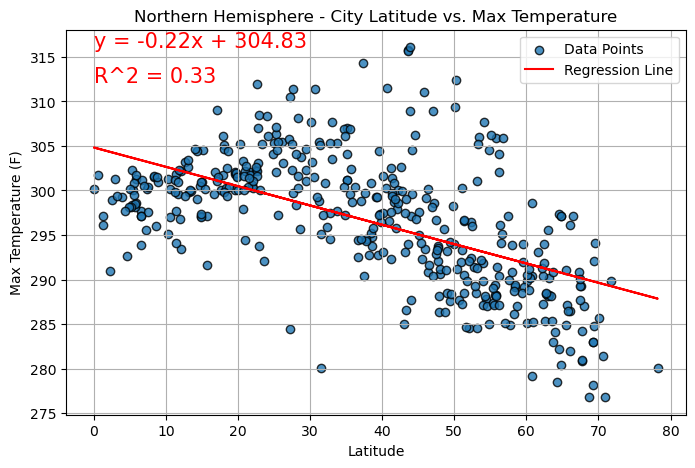

In [78]:
# Extract the variables
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]   # Convert from Kelvin to Fahrenheit if needed

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create regression line values
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Build scatter plot
plt.figure(figsize=(8, 5))  
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.80, label="Data Points")

# Plot regression line
plt.plot(x_values, regress_values, "r-", label="Regression Line")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature")
plt.grid(True)

# Add line equation and r-squared value to the plot
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")
plt.annotate(f"R^2 = {r_value**2:.2f}", (min(x_values), max(y_values) - (max(y_values) - min(y_values)) * 0.1), fontsize=15, color="red")

# Add legend
plt.legend()

# Save the figure
plt.savefig("Northern_Hemisphere_Lat_vs_MaxTemp.png")

# Show plot
plt.show()


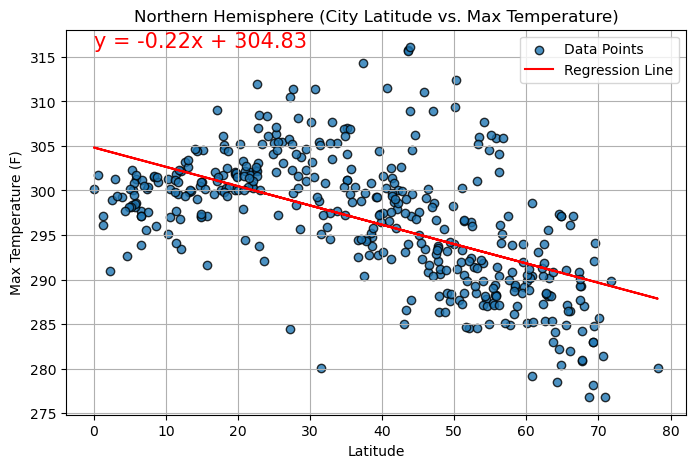

In [79]:
plt.figure(figsize=(8, 5))  # Optional: set the figure size for better visibility
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.80, label="Data Points")

# Plot regression line
plt.plot(x_values, regress_values, "r-", label="Regression Line")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere (City Latitude vs. Max Temperature)")
plt.grid(True)

# Add line equation and r-squared value to the plot
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")

# Add legend
plt.legend()

# Save the figure
plt.savefig("Lat_vs_MaxTemp.png")

# Show plot
plt.show()

The r^2-value is: 0.5158981087167762


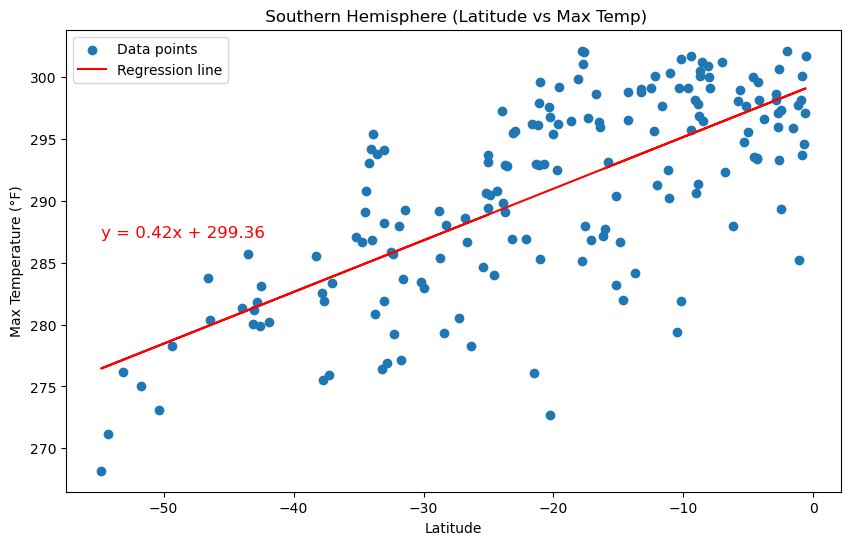

In [80]:
# Step 2: Perform linear regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate predicted values
regress_values = slope * x_values + intercept

# Step 3: Calculate R^2 value
r_squared = r_value**2

# Print R^2 value
print(f"The r^2-value is: {r_squared}")

# Step 4: Plot the data and regression line
plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, label='Data points')
plt.plot(x_values, regress_values, color='red', label='Regression line')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title(' Southern Hemisphere (Latitude vs Max Temp)')
plt.legend()

# Add slope equation to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(min(x_values), max(y_values)*0.95, equation_text, fontsize=12, color='red')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.006778353461374797


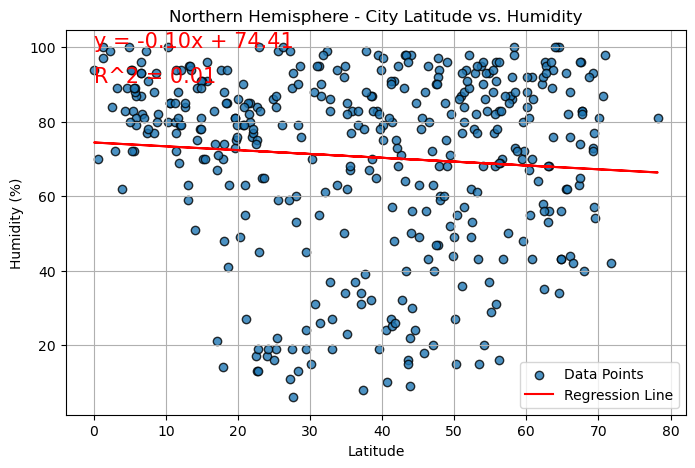

In [81]:
# Assuming 'city_data' is already defined as a list of dictionaries
city_data_df = pd.DataFrame(city_data)

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Extract the variables
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Create regression line values
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Output the R-squared value
print(f"The r^2 value is: {r_value**2}")

# Build scatter plot
plt.figure(figsize=(8, 5))  # Optional: set the figure size for better visibility
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.80, label="Data Points")

# Plot regression line
plt.plot(x_values, regress_values, "r-", label="Regression Line")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - City Latitude vs. Humidity")
plt.grid(True)

# Add line equation and r-squared value to the plot
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")
plt.annotate(f"R^2 = {r_value**2:.2f}", (min(x_values), max(y_values) - (max(y_values) - min(y_values)) * 0.1), fontsize=15, color="red")

# Add legend
plt.legend()

# Save the figure
plt.savefig("Lat_vs_Humidity.png")

# Show plot
plt.show()

The r^2-value is: 0.0003657866355606784


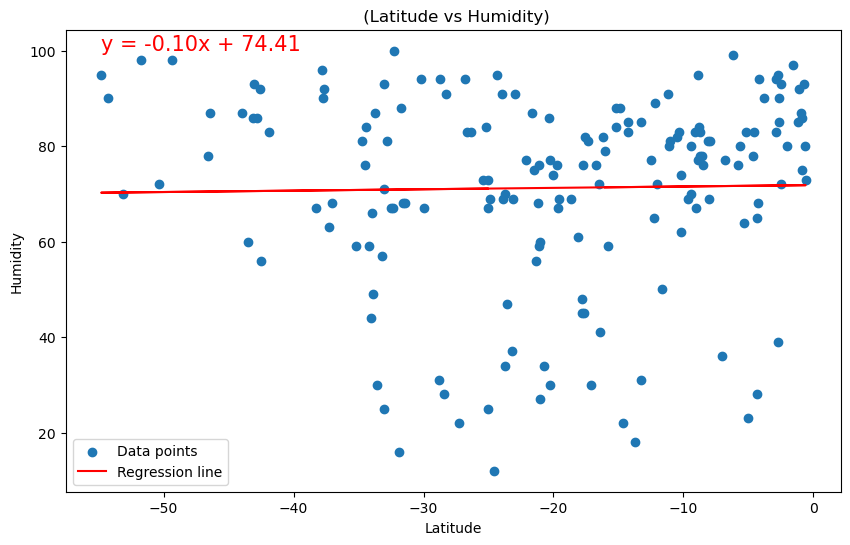

In [82]:
# Step 1: Filter Southern Hemisphere data
southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

# Step 2: Perform linear regression
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate predicted values
regress_values = slope * x_values + intercept

# Step 3: Calculate R^2 value
r_squared = r_value**2

# Print R^2 value
print(f"The r^2-value is: {r_squared}")

# Step 4: Plot the data and regression line
plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, label='Data points')
plt.plot(x_values, regress_values, color='red', label='Regression line')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(' (Latitude vs Humidity)')

# Addinf a slope equation to the graph
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")

plt.legend()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.017938178945864178


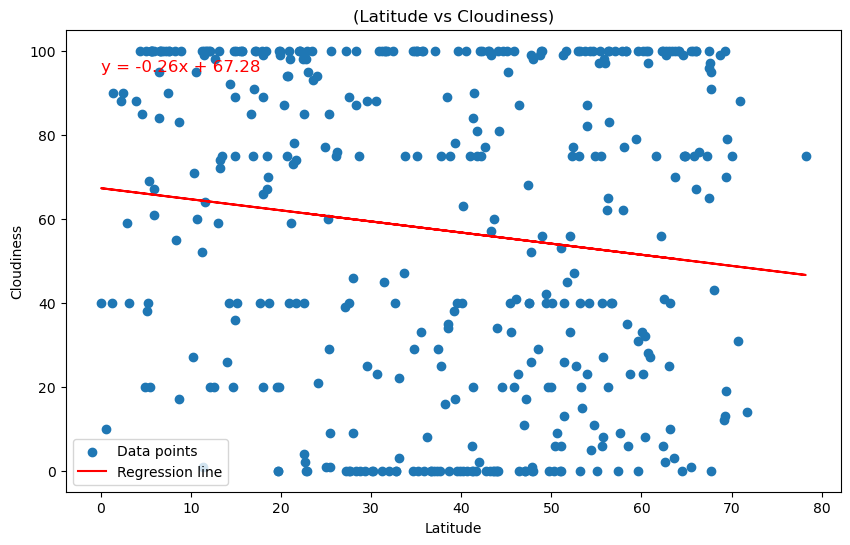

In [83]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate predicted values
regress_values = slope * x_values + intercept

# Step 3: Calculate R^2 value
r_squared = r_value**2

# Print R^2 value
print(f"The r^2-value is: {r_squared}")

# Step 4: Plot the data and regression line
plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, label='Data points')
plt.plot(x_values, regress_values, color='red', label='Regression line')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('(Latitude vs Cloudiness)')

# Add slope equation to the graph
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(min(x_values), max(y_values)*0.95, equation_text, fontsize=12, color='red')

plt.legend()
plt.show()

The r^2-value is: 0.001615982385306333


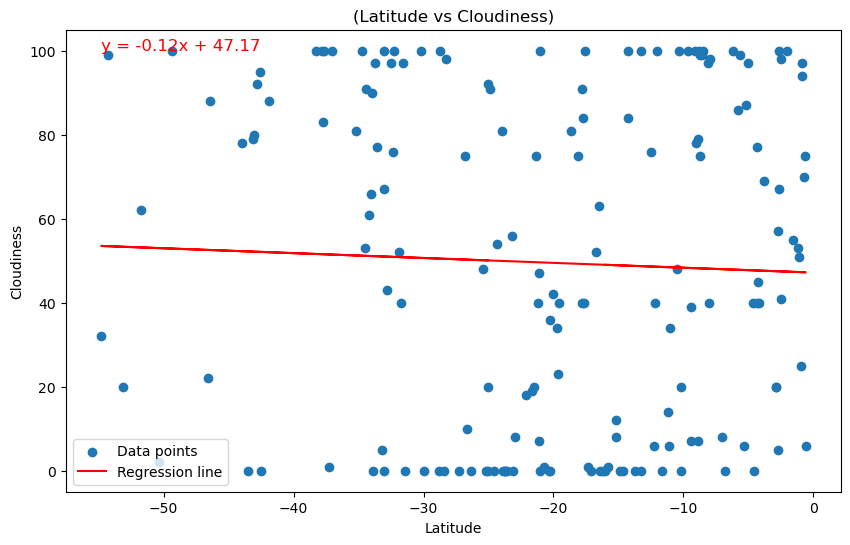

In [84]:
# Perform linear regression
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate predicted values
regress_values = slope * x_values + intercept

# Step 3: Calculate R^2 value
r_squared = r_value**2

# Print R^2 value
print(f"The r^2-value is: {r_squared}")

# Step 4: Plot the data and regression line
plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, label='Data points')
plt.plot(x_values, regress_values, color='red', label='Regression line')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('(Latitude vs Cloudiness)')

#Addign a slope equation to the grapgh
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(min(x_values), max(y_values), equation_text, fontsize=12, color='red')

plt.legend()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
While graphing and plotting these regression lines I can see that when it comes to City Latitude and Max Temperature in (the northern hemisphere) there is an inverse relationship while for the (Southern Hemispehre) there is a positive relationshp. Meaning that as the latitude is higher the temperature decreases and vice versa. When it comes to humidity, both Nothern and Southern hemisphere seem to show a slightly negative slope (negative relationship) when it comes to Latitude vs Humidity. THe same behavior is present when we compare Latitude vs Cloudiness -- Both hemispheres show a negative relationship (negative slope) howver, the northern hemisphere shows a greater negative slope of -0.26 compare to -0.12 for the Southern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.008373927213681793


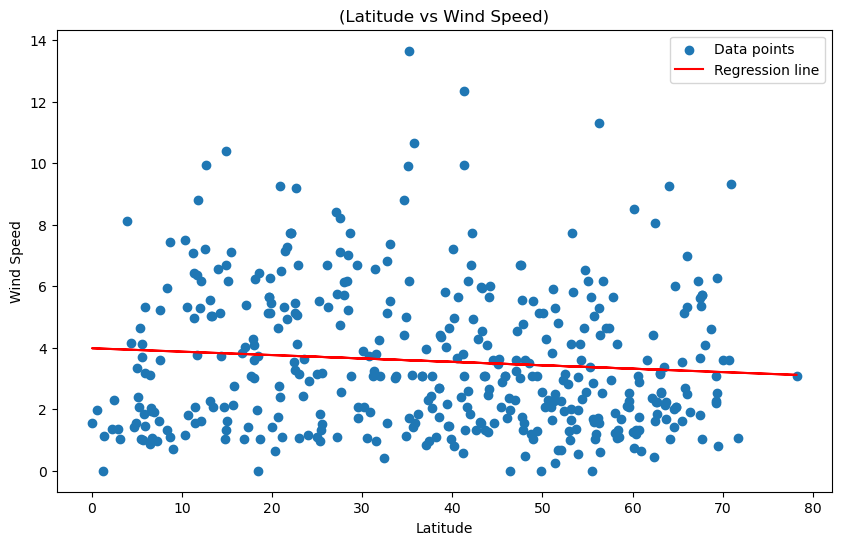

In [85]:
# Perform linear regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate predicted values
regress_values = slope * x_values + intercept

# Step 3: Calculate R^2 value
r_squared = r_value**2

# Print R^2 value
print(f"The r^2-value is: {r_squared}")

# Step 4: Plot the data and regression line
plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, label='Data points')
plt.plot(x_values, regress_values, color='red', label='Regression line')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('(Latitude vs Wind Speed)')
plt.legend()
plt.show()

The r^2-value is: 0.01653492353925956


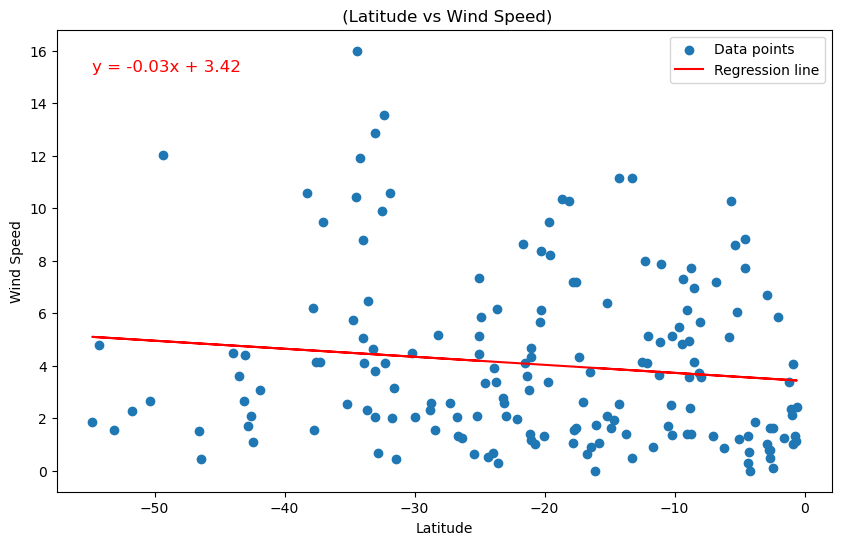

In [86]:
#  Perform linear regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate predicted values
regress_values = slope * x_values + intercept

# Step 3: Calculate R^2 value
r_squared = r_value**2

# Print R^2 value
print(f"The r^2-value is: {r_squared}")

# Step 4: Plot the data and regression line
plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, label='Data points')
plt.plot(x_values, regress_values, color='red', label='Regression line')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(' (Latitude vs Wind Speed)')
plt.legend()

equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(min(x_values), max(y_values)*0.95, equation_text, fontsize=12, color='red')

plt.show()

The r^2-value is: 0.01653492353925956


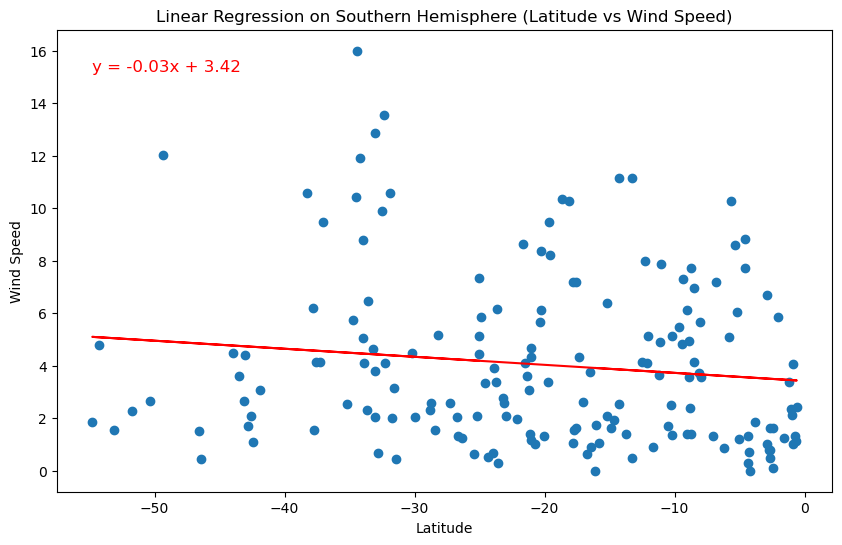

In [87]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate predicted values
regress_values = slope * x_values + intercept

# Step 3: Calculate R^2 value
r_squared = r_value**2

# Print R^2 value
print(f"The r^2-value is: {r_squared}")

# Step 4: Plot the data and regression line
plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, label='Data points')
plt.plot(x_values, regress_values, color='red', label='Regression line')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Linear Regression on Southern Hemisphere (Latitude vs Wind Speed)')
# Add slope equation to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(min(x_values), max(y_values)*0.95, equation_text, fontsize=12, color='red')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# In latitide vs Wind Speed both graphs (Nothern and Southern hemispehre) show a negative regression line (negative slope). 